In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
import pandas as pd

In [3]:
df = pd.read_csv("auto.csv")
df.head()

Unnamed: 0  symboling  normalized-losses         make aspiration  \
0           0          3                122  alfa-romero        std   
1           1          3                122  alfa-romero        std   
2           2          1                122  alfa-romero        std   
3           3          2                164         audi        std   
4           4          2                164         audi        std   

  num-of-doors   body-style drive-wheels engine-location  wheel-base  ...  \
0          two  convertible          rwd           front        88.6  ...   
1          two  convertible          rwd           front        88.6  ...   
2          two    hatchback          rwd           front        94.5  ...   
3         four        sedan          fwd           front        99.8  ...   
4         four        sedan          4wd           front        99.4  ...   

   compression-ratio  horsepower  peak-rpm  city-mpg highway-mpg    price  \
0                9.0       111.0    5000.0        21          27  13495.0   
1                9.0       111.0    5000.0        21          27  16500.0   
2                9.0       154.0    5000.0        19          26  16500.0   
3               10.0       102.0    5500.0        24          30  13950.0   
4                8.0       115.0    5500.0        18          22  17450.0   

   city-L/100km horsepower-binned  diesel  gas  
0     11.190476            Medium       0    1  
1     11.190476            Medium       0    1  
2     12.368421            Medium       0    1  
3      9.791667            Medium       0    1  
4     13.055556            Medium       0    1  

[5 rows x 30 columns]

In [4]:
# se eliminan las columnas sin datos relevantes
df.drop("Unnamed: 0",1,inplace=True)

C:\Users\juanp\AppData\Local\Temp\ipykernel_1832\1371933451.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df.drop("Unnamed: 0",1,inplace=True)


In [5]:
# se revisa si hay algún dato NaN en el df
df_null = df.replace('?',np.NAN) 
df_null.isnull().sum()

symboling            0
normalized-losses    0
make                 0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               4
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
city-L/100km         0
horsepower-binned    1
diesel               0
gas                  0
dtype: int64

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 29 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized-losses  201 non-null    int64  
 2   make               201 non-null    object 
 3   aspiration         201 non-null    object 
 4   num-of-doors       201 non-null    object 
 5   body-style         201 non-null    object 
 6   drive-wheels       201 non-null    object 
 7   engine-location    201 non-null    object 
 8   wheel-base         201 non-null    float64
 9   length             201 non-null    float64
 10  width              201 non-null    float64
 11  height             201 non-null    float64
 12  curb-weight        201 non-null    int64  
 13  engine-type        201 non-null    object 
 14  num-of-cylinders   201 non-null    object 
 15  engine-size        201 non-null    int64  
 16  fuel-system        201 non

In [7]:
# Miramos la descripción de las columnas más relevantes

df[["price","curb-weight","engine-size","highway-mpg","city-mpg","engine-size"]].describe()

price  curb-weight  engine-size  highway-mpg    city-mpg  \
count    201.000000   201.000000   201.000000   201.000000  201.000000   
mean   13207.129353  2555.666667   126.875622    30.686567   25.179104   
std     7947.066342   517.296727    41.546834     6.815150    6.423220   
min     5118.000000  1488.000000    61.000000    16.000000   13.000000   
25%     7775.000000  2169.000000    98.000000    25.000000   19.000000   
50%    10295.000000  2414.000000   120.000000    30.000000   24.000000   
75%    16500.000000  2926.000000   141.000000    34.000000   30.000000   
max    45400.000000  4066.000000   326.000000    54.000000   49.000000   

       engine-size  
count   201.000000  
mean    126.875622  
std      41.546834  
min      61.000000  
25%      98.000000  
50%     120.000000  
75%     141.000000  
max     326.000000

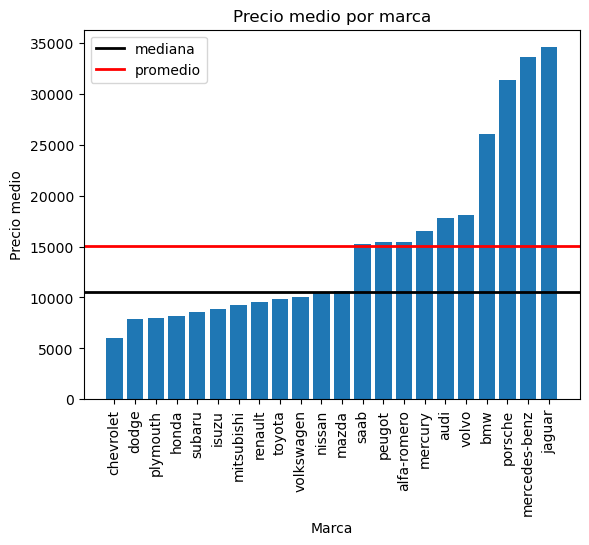

In [8]:
# se agrupan los datos por marca por precio medio
make_price=df.groupby(["make"])["price"].mean()
# se organizan los datos de forma ascendente
make_price=make_price.sort_values(ascending=True)

plt.bar(make_price.index,make_price.values)
plt.axhline(y=np.median(make_price.values),c="k",lw=2,label="mediana")
plt.axhline(y=make_price.values.mean(),c="r",lw=2,label="promedio")
plt.xlabel("Marca")
plt.ylabel("Precio medio")
plt.title("Precio medio por marca")
plt.xticks(rotation=90)
plt.legend()
plt.show()

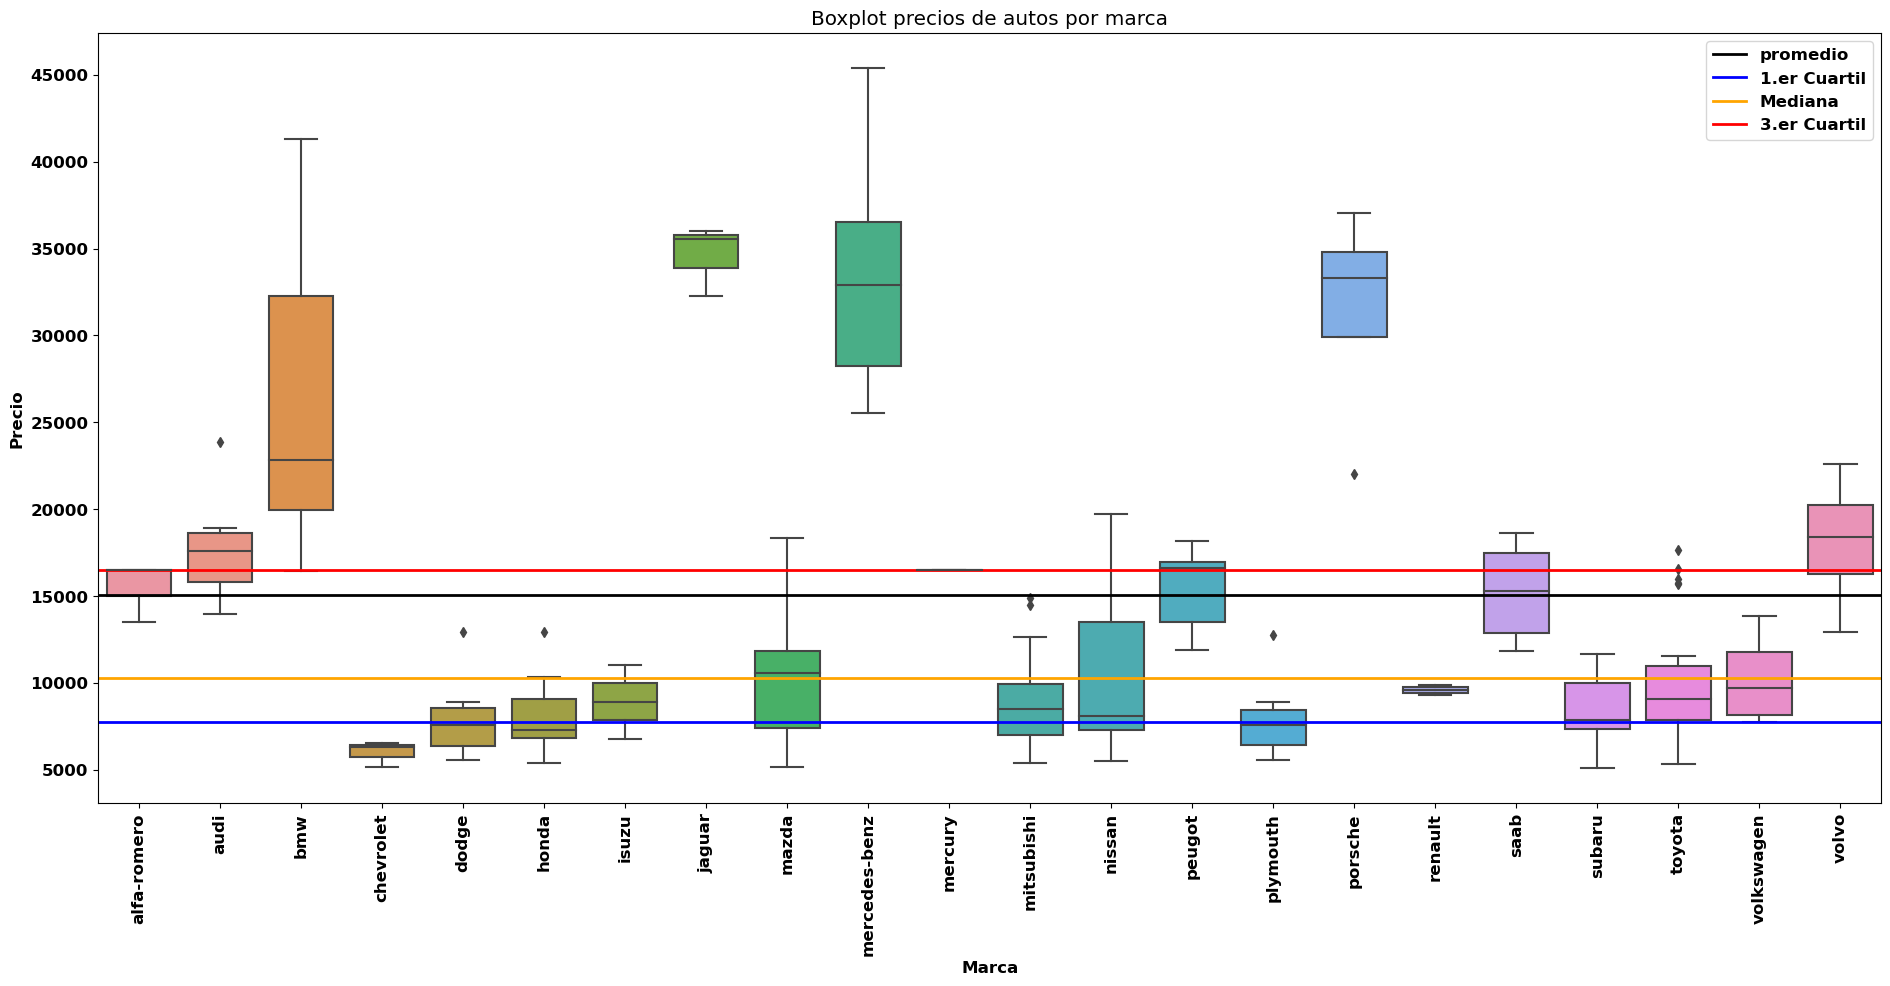

In [10]:
font = {'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

plt.title("Boxplot precios de autos por marca")

plt.rcParams['figure.figsize']=(23,10)

# Boxplot
ax = sns.boxplot(x="make", y="price", data=df)

# Cuartiles
plt.axhline(y=make_price.values.mean(),c="k",lw=2,label="promedio")
plt.axhline(y=df["price"].quantile(0.25),c="b",lw=2,label="1.er Cuartil")
plt.axhline(y=df["price"].quantile(0.5),c="orange",lw=2,label="Mediana")
plt.axhline(y=df["price"].quantile(0.75),c="r",lw=2,label="3.er Cuartil")

plt.xlabel("Marca")
plt.xticks(rotation=90)
plt.ylabel("Precio")
plt.legend()
plt.show()

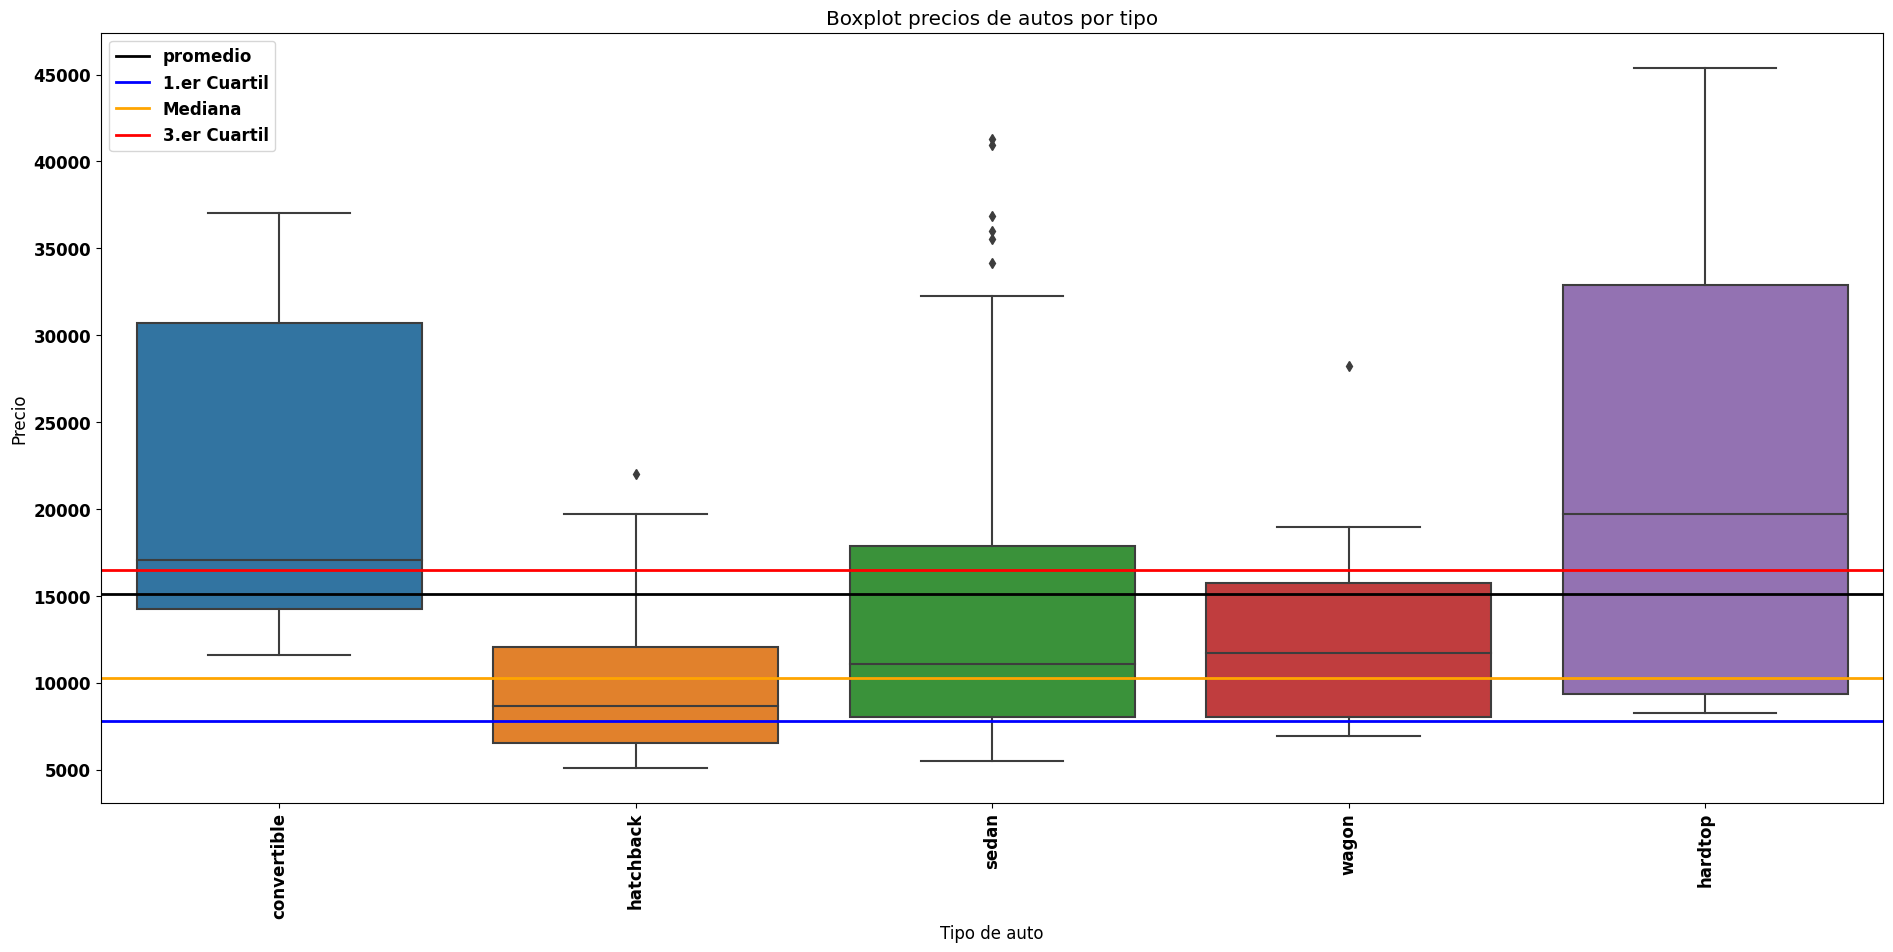

In [ ]:
plt.title("Boxplot precios de autos por tipo")

plt.rcParams['figure.figsize']=(23,10)
ax = sns.boxplot(x="body-style", y="price", data=df)

plt.axhline(y=make_price.values.mean(),c="k",lw=2,label="promedio")
plt.axhline(y=df["price"].quantile(0.25),c="b",lw=2,label="1.er Cuartil")
plt.axhline(y=df["price"].quantile(0.5),c="orange",lw=2,label="Mediana")
plt.axhline(y=df["price"].quantile(0.75),c="r",lw=2,label="3.er Cuartil")

plt.xlabel("Tipo de auto")
plt.xticks(rotation=90)
plt.ylabel("Precio")
plt.legend()
plt.show()

<Axes: xlabel='body-style', ylabel='count'>

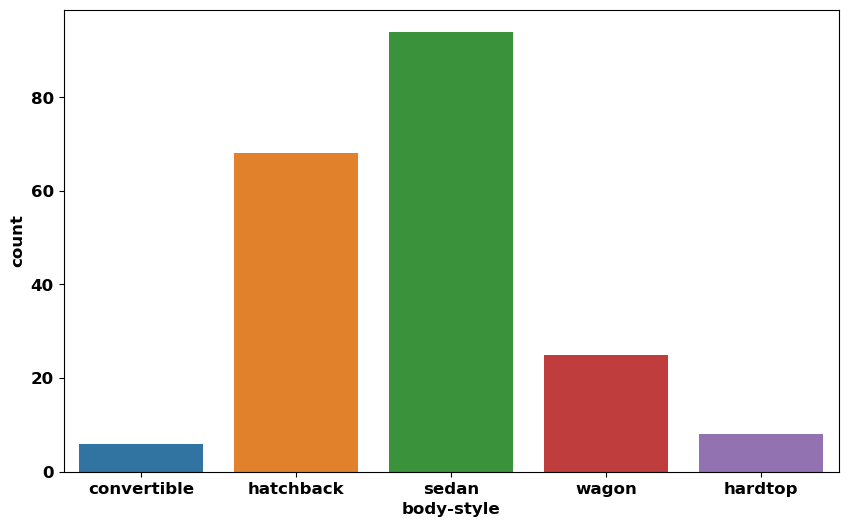

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(x="body-style", data=df)

C:\Users\juanp\AppData\Local\Temp\ipykernel_1832\1794766524.py:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


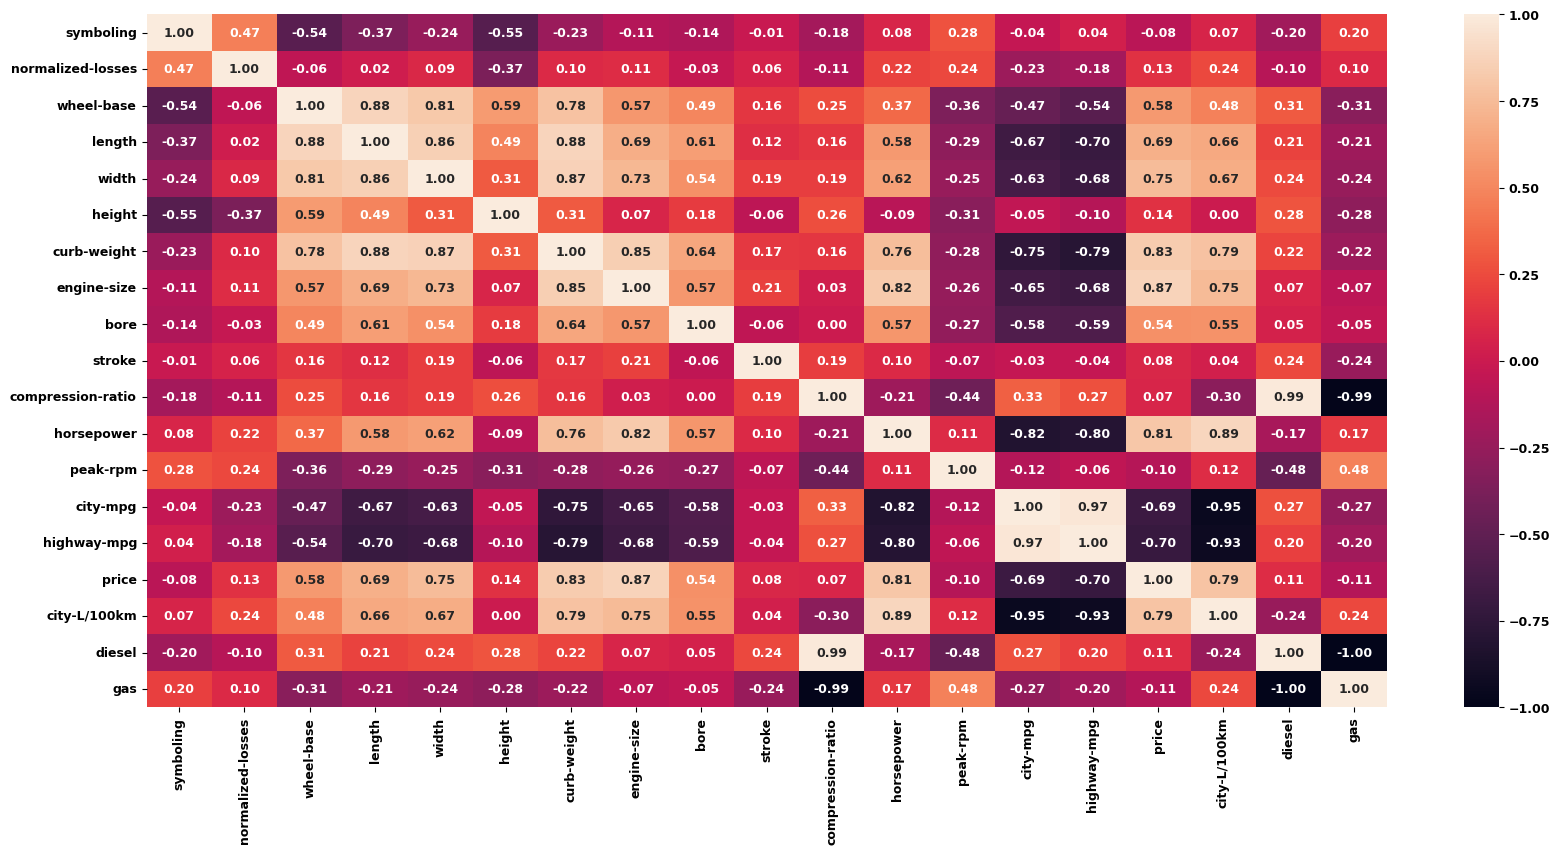

In [13]:
font = {'weight' : 'bold', 'size'   : 9}
plt.rc('font', **font)

corr = df.corr()
plt.figure(figsize=(20,9))
a = sns.heatmap(corr, annot=True, fmt='.2f')

plt.show()

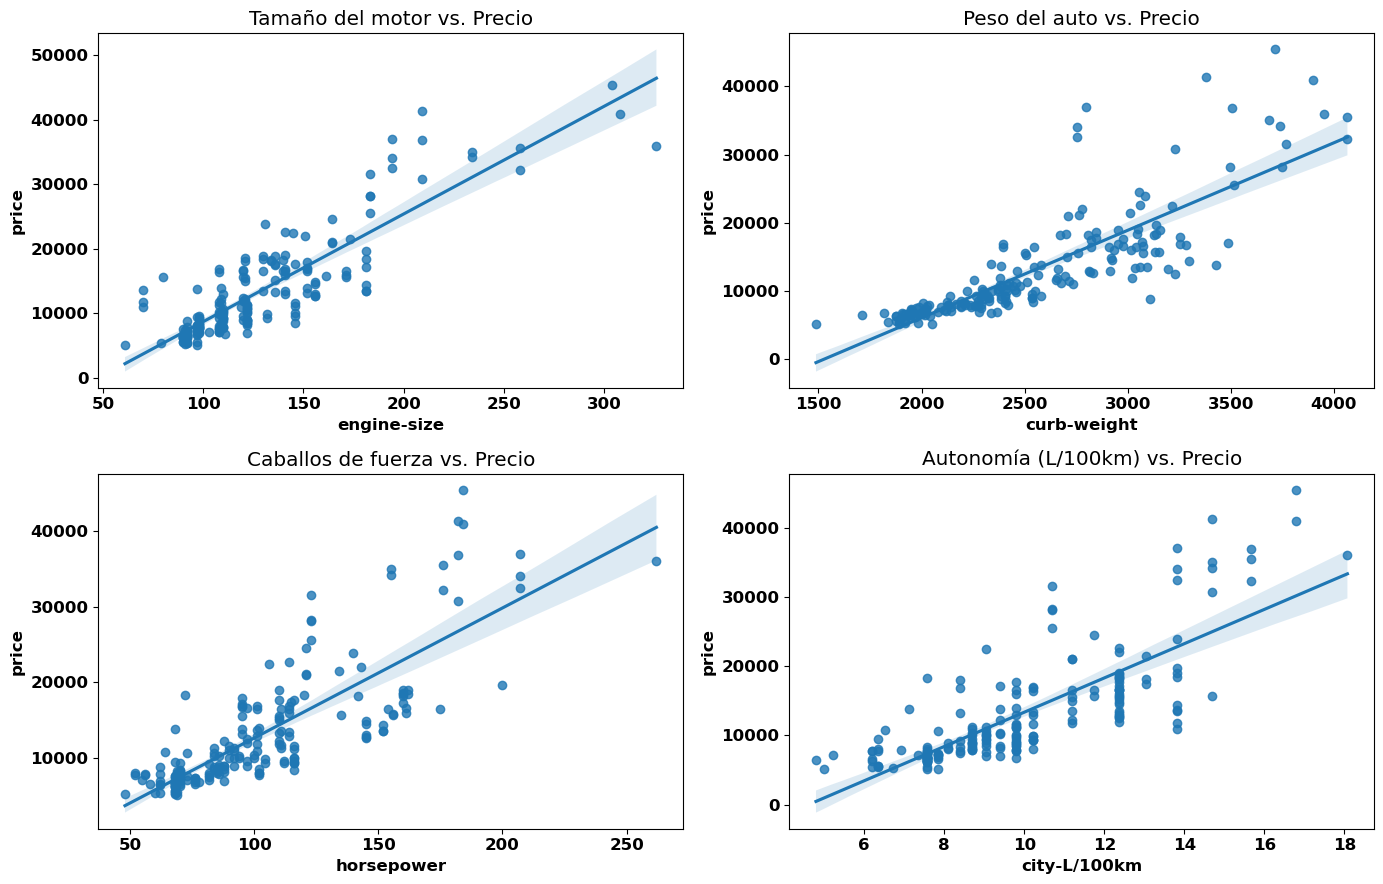

In [14]:
font = {'weight' : 'bold', 'size'   : 12}
plt.rc('font', **font)

fig, axes = plt.subplots(2, 2, figsize=(14, 9))

sns.regplot(x="engine-size", y="price", data=df, ax=axes[0, 0])
axes[0, 0].set_title("Tamaño del motor vs. Precio")

sns.regplot(x="curb-weight", y="price", data=df, ax=axes[0, 1])
axes[0, 1].set_title("Peso del auto vs. Precio")

sns.regplot(x="horsepower", y="price", data=df, ax=axes[1, 0])
axes[1, 0].set_title("Caballos de fuerza vs. Precio")

sns.regplot(x="city-L/100km", y="price", data=df, ax=axes[1, 1])
axes[1, 1].set_title("Autonomía (L/100km) vs. Precio")

plt.tight_layout()
plt.show()

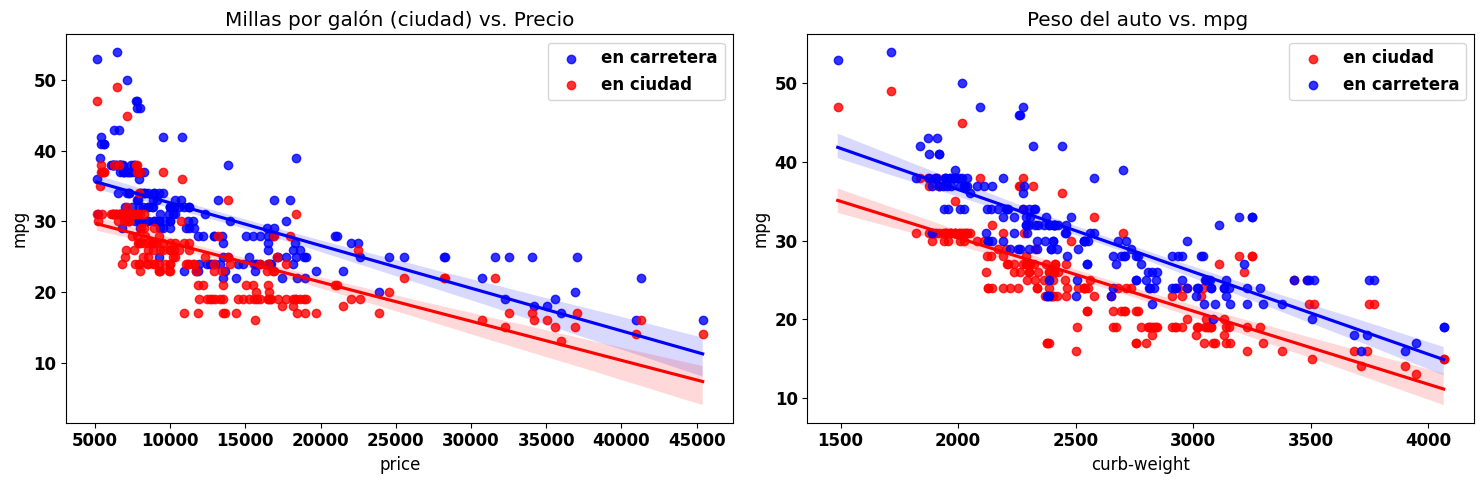

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

sns.regplot(x="price", y="highway-mpg", data=df,ax=axes[0],label="en carretera",color="b")
sns.regplot(x="price", y="city-mpg", data=df, ax=axes[0],label="en ciudad",color="r")
axes[0].set_ylabel("mpg")
axes[0].legend()
axes[0].set_title("Millas por galón (ciudad) vs. Precio")

sns.regplot(x="curb-weight", y="city-mpg", data=df, ax=axes[1],label="en ciudad",color="r")
sns.regplot(x="curb-weight", y="highway-mpg", data=df, ax=axes[1],label="en carretera",color="b")
axes[1].set_ylabel("mpg")
axes[1].legend()
axes[1].set_title("Peso del auto vs. mpg ")

plt.tight_layout()
plt.show()